# Lab 9: Clustering


In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_samples, silhouette_score

import seaborn as sns
%matplotlib inline

In [2]:
# Load iris datset, set 'species' to be categorical variable containing
# class labels
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                    columns= iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.drop('target', axis='columns',inplace=True)

In [3]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

# Exploring and Evaluating Clusters

## K-means

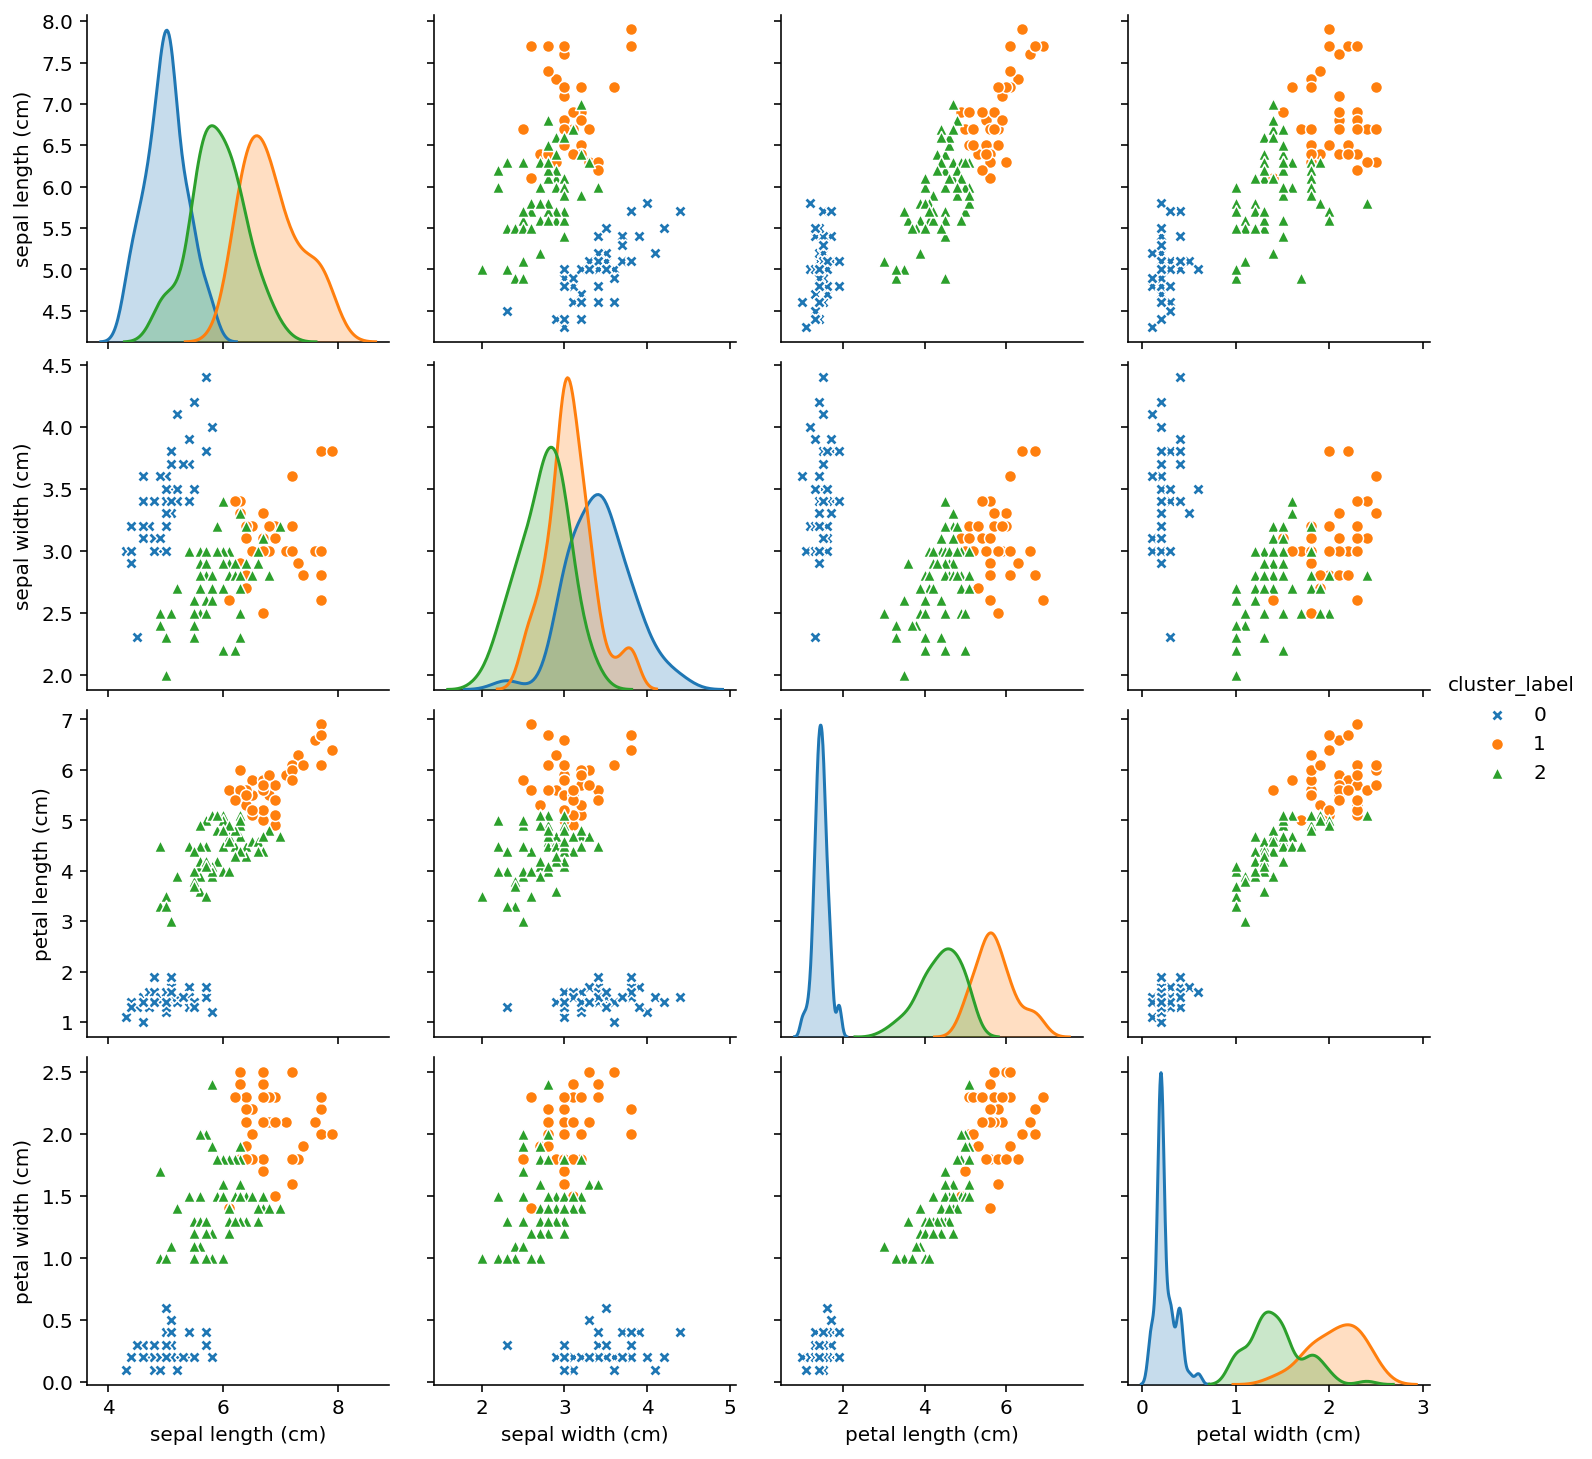

In [4]:
# Let's use a pipeline so we can add preprocessing steps later
cl_pipe = Pipeline([
    ('kmeancl',KMeans(n_clusters=3)) # Name of operator and cluster number
])

# Fit the cluster and predict the label in one step. Calls any preprocessing step plus model
df['cluster_label'] = cl_pipe.fit_predict(X)

# Create a pairplot using seaborn
sns.pairplot(vars=iris['feature_names'], # Variable names   
             hue='cluster_label',        # How to colour the points. Use cluster labels
             markers=['X','o','^'],      # Differentiate markers
             data=df                     # What data to use
            )

## Agglomerative

In [ ]:
# Now a pipeline with the agglomerative cluster. Receibes
cl_pipe = Pipeline([
    ('aggcl',AgglomerativeClustering(n_clusters=3,         # Number of clusters
                                     affinity='euclidean', # Type of distance. Depends on your data and you can create your own!
                                     linkage="single"      # Type of linkage. Options 
                                    )
    )
])

df['cluster_label'] = cl_pipe.fit_predict(X)

sns.pairplot(vars=iris['feature_names'], 
             hue='cluster_label',
             markers=['X','o','^'],
             data=df,
             diag_kind='hist'            # What plot to use for diagonal. kde causes issues in single linkage due to too few points
            )

In [ ]:
# Now a pipeline with the agglomerative cluster. Receibes
cl_pipe = Pipeline([
    ('aggcl',AgglomerativeClustering(n_clusters=3,         # Number of clusters
                                     affinity='euclidean', # Type of distance. Depends on your data and you can create your own!
                                     linkage="complete"      # Type of linkage. Options 
                                    )
    )
])

df['cluster_label'] = cl_pipe.fit_predict(X)

sns.pairplot(vars=iris['feature_names'], 
             hue='cluster_label',
             markers=['X','o','^'],
             data=df,
             diag_kind='kde'            # What plot to use for diagonal. kde causes issues in single linkage due to too few points
            )

In [ ]:
# Now a pipeline with the agglomerative cluster. Receibes
cl_pipe = Pipeline([
    ('aggcl',AgglomerativeClustering(n_clusters=3,         # Number of clusters
                                     affinity='euclidean', # Type of distance. Depends on your data and you can create your own!
                                     linkage="average"      # Type of linkage. Options 
                                    )
    )
])

df['cluster_label'] = cl_pipe.fit_predict(X)

sns.pairplot(vars=iris['feature_names'], 
             hue='cluster_label',
             markers=['X','o','^'],
             data=df,
             diag_kind='kde'            # What plot to use for diagonal. kde causes issues in single linkage due to too few points
            )

## Scaling

In [ ]:
# Now we create a proper pipeline with scaling and a model
cl_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('aggcl', AgglomerativeClustering(n_clusters=3, linkage="single"))
])

# Again we fit and predict
df['cluster_label_scaled'] = cl_pipe.fit_predict(X)

# And we plot
sns.pairplot(vars=iris['feature_names'],
             hue='cluster_label_scaled',
             data=df,
             diag_kind='hist')

# Some synthetic data

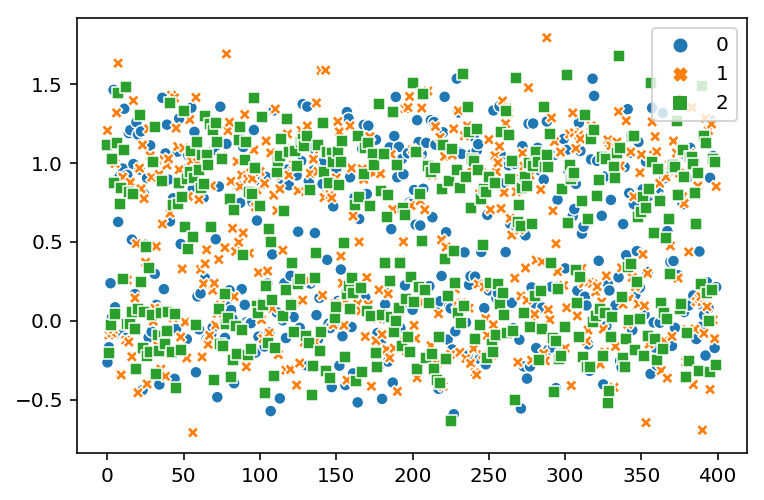

In [37]:
centers = [(0,0,0),(0,0,1),(0,1,0),(0,1,1),
           (1,0,0),(1,0,1),(1,1,0),(1,1,1)]
X, y = datasets.make_blobs(n_samples=400, centers=centers, 
           cluster_std=0.25, shuffle=True, random_state=0)

synth_df = pd.DataFrame(X)
sns.scatterplot(data=X)

0.39922293240441903


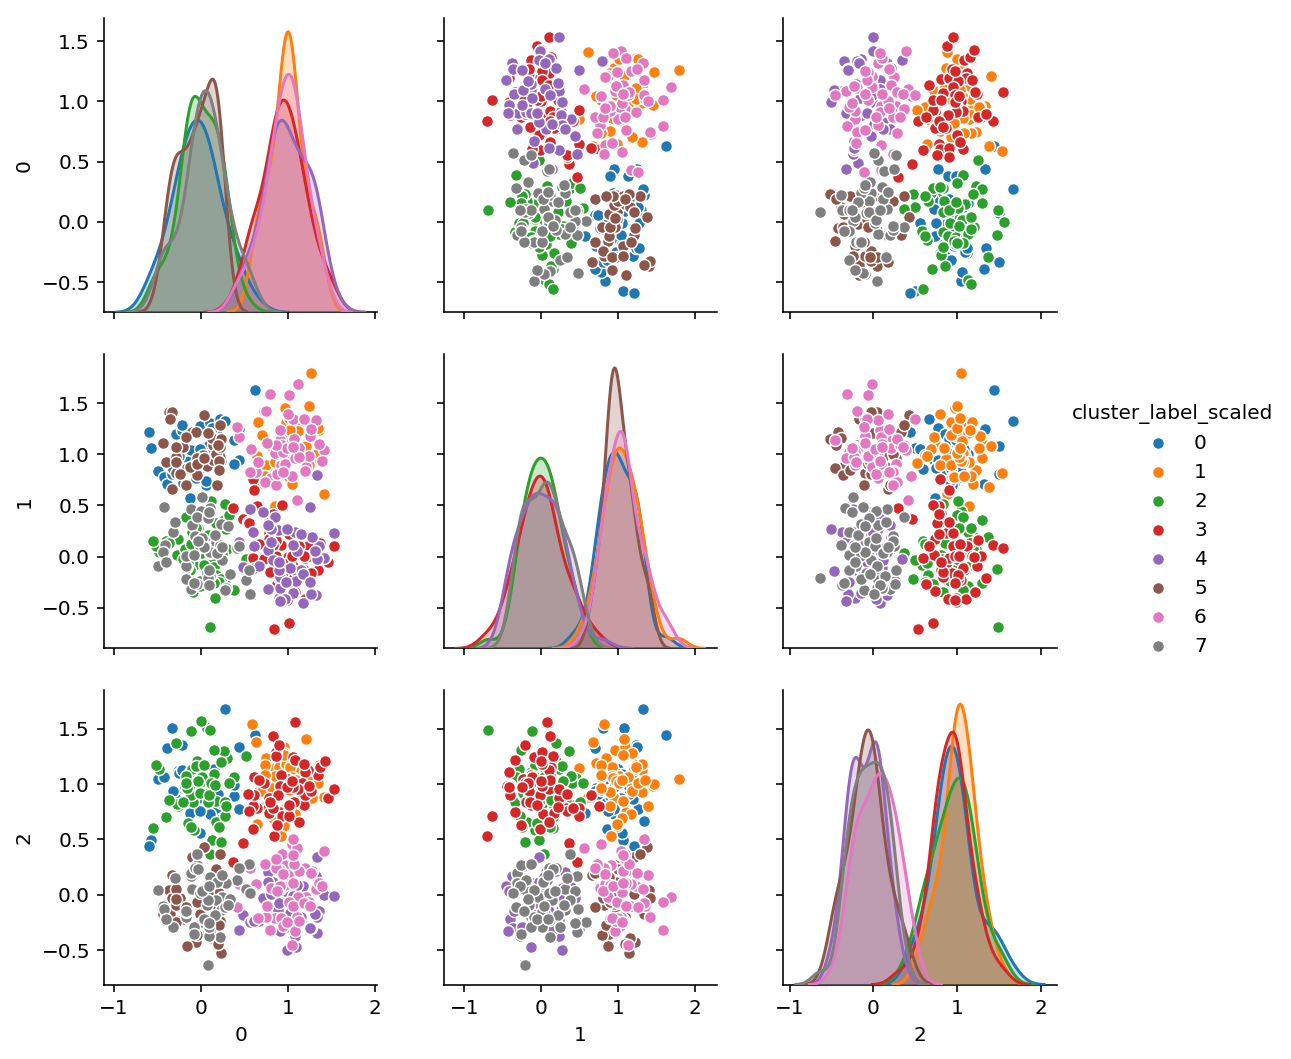

In [48]:
acl_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('aggcl', AgglomerativeClustering(n_clusters=8, linkage="average"))
])

synth_df['cluster_label_scaled'] = acl_pipe.fit_predict(X)

print(silhouette_score(X, synth_df['cluster_label_scaled']))

sns.pairplot(hue='cluster_label_scaled', vars=[0,1,2], data=synth_df)

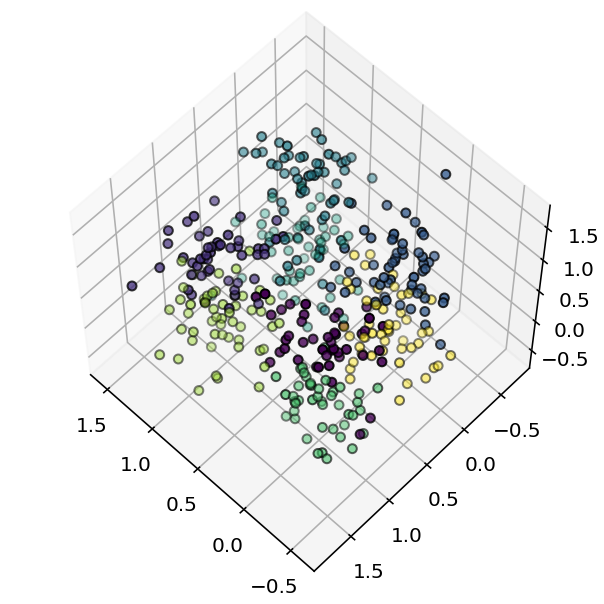

In [49]:
fig = plt.figure(figsize=(4, 4))
ax = Axes3D(fig, elev=60, azim=134)
ax.scatter(synth_df.iloc[:, 0], synth_df.iloc[:, 1], synth_df.iloc[:, 2],
           c=synth_df['cluster_label_scaled'], edgecolor='k')

# More synthetic data

In [52]:
X, y = datasets.make_moons(n_samples=400, random_state=0)

synth_df = pd.DataFrame(X)

0.33436858233898126


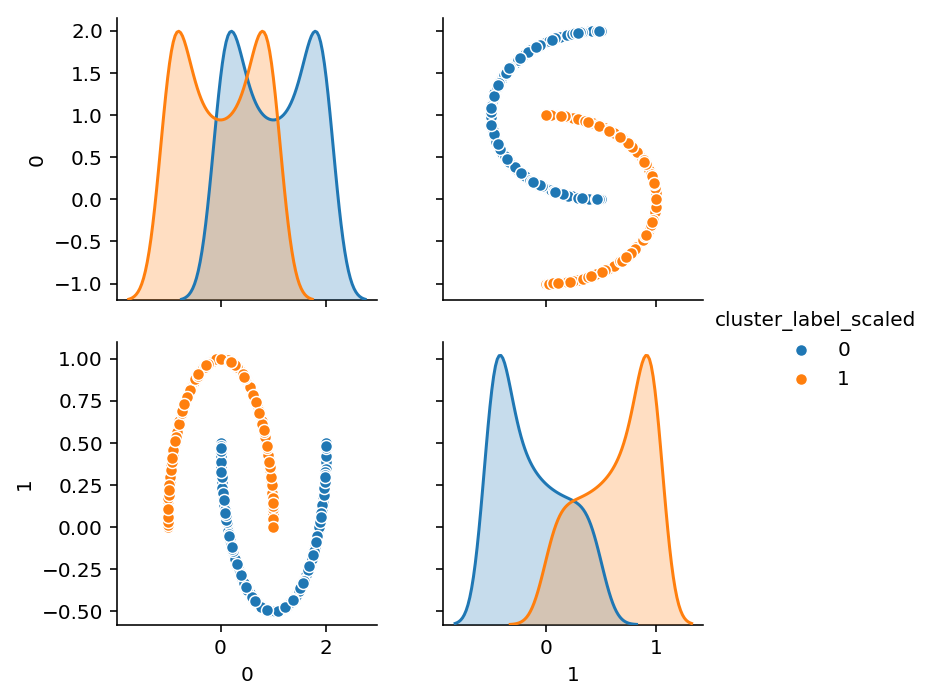

In [56]:
acl_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('aggcl', AgglomerativeClustering(n_clusters=2, linkage="single"))
])

synth_df['cluster_label_scaled'] = acl_pipe.fit_predict(X)

print(silhouette_score(X, synth_df['cluster_label_scaled']))

sns.pairplot(hue='cluster_label_scaled', vars=[0,1], data=synth_df)

0.47277090909866165


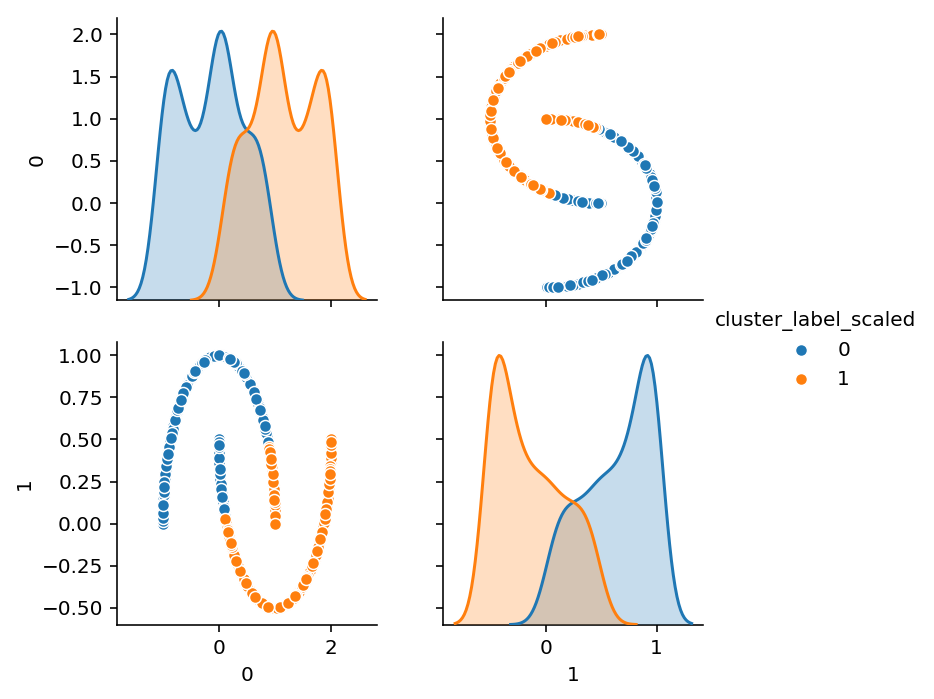

In [54]:
acl_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('aggcl', KMeans(n_clusters=2))
])

synth_df['cluster_label_scaled'] = acl_pipe.fit_predict(X)

print(silhouette_score(X, synth_df['cluster_label_scaled']))

sns.pairplot(hue='cluster_label_scaled', vars=[0,1], data=synth_df)